<a href="https://colab.research.google.com/github/guilhermeterenciani/IA/blob/main/09_flickr_treino_meu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import urllib.request
import os
from PIL import Image,ImageStat
import numpy as np
import matplotlib.pyplot as plt

import torchvision
import torch
import torch.nn as nn
from torch.utils.data import  DataLoader
import torchvision.transforms as transforms

from torch import optim
import sklearn.metrics as metrics

In [ ]:
import torch.nn.functional as F

#Rede Convolucional

In [ ]:
                #(batch,channels,height,width)


In [ ]:
conv1 = nn.Conv2d(in_channels=3,out_channels=6,kernel_size=5,stride=1,padding=0)
conv2 = nn.Conv2d(in_channels=6,out_channels=16,kernel_size=5,stride=1,padding=0)
relu = nn.ReLU()
maxpool = nn.MaxPool2d(kernel_size=2,stride=2,padding=0)
flatten = nn.Flatten()
fc1 = nn.Linear(18496,120)
fc2 = nn.Linear(120,84)
fc3 = nn.Linear(84,10)

In [ ]:
x = torch.randn(1,3,150,150)
x = conv1(x)
x = relu(x)
x = maxpool(x)
x = conv2(x)
x = relu(x)
x = maxpool(x)
x = flatten(x)
x = fc1(x)
x = relu(x)
x = fc2(x)
x = relu(x)
x = fc3(x)

In [ ]:
x.shape

torch.Size([1, 10])

In [ ]:
x = conv1(x)
x = relu(x)
x = maxpool(x)

RuntimeError: ignored

In [ ]:
x.shape

torch.Size([1, 10])

Exercício 1: Implemente a seguinte arquitetura

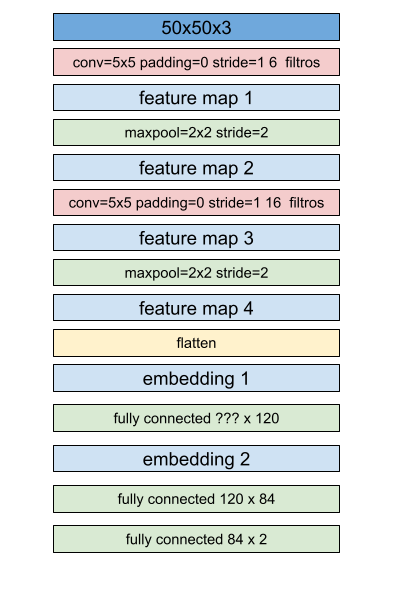

In [ ]:

class LeNet(nn.Module):
    def __init__(self):
        super(LeNet,self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=6,kernel_size=5,stride=1,padding=0)
        self.conv2 = nn.Conv2d(in_channels=6,out_channels=16,kernel_size=5,stride=1,padding=0)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2,stride=2,padding=0)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(1296,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,5)

    def forward(self,x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)

        return x

In [ ]:
model = LeNet()

In [ ]:
model

LeNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=1296, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=5, bias=True)
)

In [ ]:
import torchsummary

In [ ]:
torchsummary.summary(model,(3,50,50),device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 46, 46]             456
              ReLU-2            [-1, 6, 46, 46]               0
         MaxPool2d-3            [-1, 6, 23, 23]               0
            Conv2d-4           [-1, 16, 19, 19]           2,416
              ReLU-5           [-1, 16, 19, 19]               0
         MaxPool2d-6             [-1, 16, 9, 9]               0
           Flatten-7                 [-1, 1296]               0
            Linear-8                  [-1, 120]         155,640
              ReLU-9                  [-1, 120]               0
           Linear-10                   [-1, 84]          10,164
             ReLU-11                   [-1, 84]               0
           Linear-12                    [-1, 5]             425
Total params: 169,101
Trainable params: 169,101
Non-trainable params: 0
-------------------------------

In [ ]:
#model[11] = nn.Linear(84,10)

In [ ]:
model

LeNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=1296, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=5, bias=True)
)

In [ ]:
import torchsummary

In [ ]:
x = torch.randn(10,3,50,50)

In [ ]:
model = LeNet()


In [ ]:
model(x)

tensor([[-0.0330,  0.0594,  0.0150, -0.0287, -0.0224],
        [-0.0363,  0.0567,  0.0265, -0.0129, -0.0272],
        [-0.0070,  0.0564, -0.0092, -0.0543, -0.0225],
        [-0.0520,  0.0547,  0.0135, -0.0210, -0.0152],
        [-0.0459,  0.0481,  0.0302, -0.0433, -0.0362],
        [-0.0301,  0.0718,  0.0125, -0.0342, -0.0341],
        [-0.0362,  0.0482,  0.0185, -0.0601, -0.0209],
        [-0.0555,  0.0645,  0.0077, -0.0371, -0.0279],
        [-0.0473,  0.0534,  0.0216, -0.0204, -0.0223],
        [-0.0242,  0.0516,  0.0086, -0.0208, -0.0443]],
       grad_fn=<AddmmBackward0>)

In [ ]:
torchsummary.summary(model,(3,50,50),device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 46, 46]             456
              ReLU-2            [-1, 6, 46, 46]               0
         MaxPool2d-3            [-1, 6, 23, 23]               0
            Conv2d-4           [-1, 16, 19, 19]           2,416
              ReLU-5           [-1, 16, 19, 19]               0
         MaxPool2d-6             [-1, 16, 9, 9]               0
           Flatten-7                 [-1, 1296]               0
            Linear-8                  [-1, 120]         155,640
              ReLU-9                  [-1, 120]               0
           Linear-10                   [-1, 84]          10,164
             ReLU-11                   [-1, 84]               0
           Linear-12                    [-1, 5]             425
Total params: 169,101
Trainable params: 169,101
Non-trainable params: 0
-------------------------------

In [ ]:

class LeNet2(nn.Module):
    def __init__(self):
        super(LeNet2,self).__init__()
        self.backbone = nn.Sequential(
            nn.Conv2d(in_channels=3,out_channels=6,kernel_size=5,stride=1,padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2,padding=0),
            nn.Conv2d(in_channels=6,out_channels=16,kernel_size=5,stride=1,padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2,padding=0),
            nn.Flatten()
        )
        self.classifier = nn.Sequential(
            nn.Linear(1296,120),
            nn.ReLU(),
            nn.Linear(120,84),
            nn.ReLU(),
            nn.Linear(84,2),
        )


    def forward(self,x):
        x = self.backbone(x)
        x = self.classifier(x)
        return x


In [ ]:
model2 = LeNet2()

In [ ]:
torchsummary.summary(model2,(3,50,50),device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 46, 46]             456
              ReLU-2            [-1, 6, 46, 46]               0
         MaxPool2d-3            [-1, 6, 23, 23]               0
            Conv2d-4           [-1, 16, 19, 19]           2,416
              ReLU-5           [-1, 16, 19, 19]               0
         MaxPool2d-6             [-1, 16, 9, 9]               0
           Flatten-7                 [-1, 1296]               0
            Linear-8                  [-1, 120]         155,640
              ReLU-9                  [-1, 120]               0
           Linear-10                   [-1, 84]          10,164
             ReLU-11                   [-1, 84]               0
           Linear-12                   [-1, 10]             850
Total params: 169,526
Trainable params: 169,526
Non-trainable params: 0
-------------------------------

In [ ]:
model2

LeNet2(
  (backbone): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
  )
  (classifier): Sequential(
    (0): Linear(in_features=1296, out_features=120, bias=True)
    (1): ReLU()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): ReLU()
    (4): Linear(in_features=84, out_features=10, bias=True)
  )
)

In [ ]:
model2.classifier = nn.Sequential(nn.Linear(1296,30),nn.ReLU(),nn.Linear(30,10))

In [ ]:
model2

LeNet2(
  (backbone): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
  )
  (classifier): Sequential(
    (0): Linear(in_features=1296, out_features=30, bias=True)
    (1): ReLU()
    (2): Linear(in_features=30, out_features=10, bias=True)
  )
)

In [ ]:
model2.classifier[0] = nn.Linear(1296,50)
model2.classifier[2] = nn.Linear(50,10)

In [ ]:
model2

LeNet2(
  (backbone): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
  )
  (classifier): Sequential(
    (0): Linear(in_features=1296, out_features=50, bias=True)
    (1): ReLU()
    (2): Linear(in_features=50, out_features=10, bias=True)
  )
)

In [ ]:
torchsummary.summary(model2,(3,50,50),device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 46, 46]             456
              ReLU-2            [-1, 6, 46, 46]               0
         MaxPool2d-3            [-1, 6, 23, 23]               0
            Conv2d-4           [-1, 16, 19, 19]           2,416
              ReLU-5           [-1, 16, 19, 19]               0
         MaxPool2d-6             [-1, 16, 9, 9]               0
           Flatten-7                 [-1, 1296]               0
            Linear-8                   [-1, 50]          64,850
              ReLU-9                   [-1, 50]               0
           Linear-10                   [-1, 10]             510
Total params: 68,232
Trainable params: 68,232
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.03
Forward/backward pass size (MB): 0.33
Params size (MB): 0.26
Estimated Tot

In [ ]:

#model = torchvision.models.mobilenet_v3_large(weights = torchvision.models.MobileNet_V3_Large_Weights.IMAGENET1K_V2)

In [ ]:
model

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        )
      )
    )
    (2): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1), bi

In [ ]:
model.classifier[3] = nn.Linear(1280,5)

In [ ]:
model

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        )
      )
    )
    (2): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1), bi

In [ ]:
model.classifier = nn.Linear(960,5)

In [ ]:
model

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        )
      )
    )
    (2): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1), bi

In [ ]:
for layer in model.children():
    print(layer)

Sequential(
  (0): Conv2dNormActivation(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
    (2): Hardswish()
  )
  (1): InvertedResidual(
    (block): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
        (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
      (1): Conv2dNormActivation(
        (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      )
    )
  )
  (2): InvertedResidual(
    (block): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=0.001, momentum=0.01, affine

In [ ]:
model.classifier[3] = nn.Linear(1280,2)

In [ ]:
model.classifier

Linear(in_features=960, out_features=5, bias=True)

# construção do dataset

Abra o browser e faça uma busca sobre a classe desejadan no site http://flickr.com

Na pagina de busca digite `<crtl>-<shift>-j` e no console cole o código abaixo
```
urls =  Array.from(document.querySelectorAll("div.photo-list-photo-container")).map(el => el.firstElementChild.src); window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

Salve o arquivo como csv

Caso tenha adblocker, você precisa desabilitá-lo.

In [ ]:
def download_images(main_dir,urls_filename):
    class_name = urls_filename.split('.')[-2]
    output_dir = main_dir+os.sep+class_name
    os.makedirs(output_dir,exist_ok=True)
    with open(urls_filename) as f:
        for url in f:
            img_filename = url.split('/')[-1].replace("\n","")
            print(img_filename)
            try:
                response = urllib.request.urlopen(url)
                open(output_dir+'/'+img_filename,mode="wb+").write(response.read())
            except:
                print('nao conseguiu baixar ',url)

In [ ]:
!pwd

/content


In [ ]:
main_dir = "/content/drive/MyDrive/Mestrado2023/IA/pessoas"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir(main_dir)

In [ ]:
!ls

fusca.csv  porche.csv


In [ ]:
#download_images(main_dir,'homem.csv')

4701006920_343b920a96_m.jpg
17346741312_e1955f42d1_m.jpg
16726143714_26307f01aa_m.jpg
17392521011_e4e29041d3_w.jpg
17161067710_bfa4d26bde_m.jpg
5668079088_2d0c06ee2d_m.jpg
131524291_1ac8e29d61_n.jpg
131524294_9329ed9f3a_n.jpg
16772609043_6d35343307_m.jpg
17354544701_4d8343c7bf_m.jpg
5248184094_e80beda315_m.jpg
147803852_5ab37d430b_m.jpg
5247578715_bdacd5092d_m.jpg
147803849_83dd8347fd_n.jpg
4666357774_b08a67c8a6_n.jpg
928319549_be51a72787_m.jpg
4001548181_b175ae943b_m.jpg
3342570445_e2a0ca2b56_n.jpg
3950443443_56ae1a7536_n.jpg
43611099212_1f118657b9_n.jpg
84777488_ebd4ab4d66_n.jpg
243204679_51748be603_m.jpg
17160503000_3c75525ce5_m.jpg
16770364034_0cf67d63c8_m.jpg
9138666775_7cfa2dfbe4_n.jpg
23390479820_d43e4591b0_n.jpg
17366909076_673ba22881_n.jpg
23191132459_d5c0699ee2_m.jpg
5717466412_336e044dde_n.jpg
4083652841_34ac1ffe85_n.jpg
28432703431_a03390c0a1_n.jpg
645487_2e990ecdb7_m.jpg
309076205_770bcb61b6_m.jpg
6156909801_7b4a2d5917_n.jpg
2860498848_721b30e0d5_m.jpg
335747422_4018baf1d2

In [ ]:
#download_images(main_dir,'mulher.csv')

9170073538_c849032201_m.jpg
51236769411_987b0bff67_m.jpg
6877099471_2cc2c7068d_m.jpg
3533474374_f1309f1d88_m.jpg
51680753610_451f7bb0d6_m.jpg
6948624694_473bcf779b_m.jpg
50324089006_f047500f80_m.jpg
5573344320_01b574d221_m.jpg
4500950566_f1723fdfe9_m.jpg
4378167862_7b7382f084_m.jpg
2406536756_47df744c8c_m.jpg
4347331664_b2acf5097d_n.jpg
2657850409_5874cd929a_m.jpg
1811259600_cbf584543a_q.jpg
2084849891_fd4a647808_m.jpg
50401475388_7d9ab10238_m.jpg
3190589339_6278f72aee_m.jpg
3656338117_b278336c83_n.jpg
8414428051_ce5efc8ddd_m.jpg
4718754592_afbef3df45_m.jpg
6818723682_3185c20783_n.jpg
8415521244_8076244aa1_m.jpg
3129621666_46a0d8cc87_m.jpg
4416321673_35eb1ac9e5_m.jpg
8414425273_01a5ee6626_m.jpg
3456668212_8f6572232e_m.jpg
4053069214_87f0a95498_m.jpg
3412922913_9ee608e034_m.jpg
1044393274_bcc04cb301_m.jpg
2287461020_d33c815e66_n.jpg
2247478942_90c6fa06c2_m.jpg
5515241079_e8a7235b37_m.jpg
6103538060_19254fc8de_w.jpg
2501439560_d89b887e9b_n.jpg
160381813_4f2b620e58_m.jpg
5236546740_d3478c

In [ ]:
device = torch.device('cuda:0')
device

device(type='cuda', index=0)

In [ ]:
model = LeNet2()

In [ ]:
model

LeNet2(
  (backbone): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
  )
  (classifier): Sequential(
    (0): Linear(in_features=1296, out_features=120, bias=True)
    (1): ReLU()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): ReLU()
    (4): Linear(in_features=84, out_features=2, bias=True)
  )
)

In [ ]:
model.to(device)

LeNet2(
  (backbone): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
  )
  (classifier): Sequential(
    (0): Linear(in_features=1296, out_features=120, bias=True)
    (1): ReLU()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): ReLU()
    (4): Linear(in_features=84, out_features=2, bias=True)
  )
)

## construção do loader

In [ ]:
def image_loader(img):
    return Image.open(img).convert("RGB")

In [ ]:
img = image_loader('./homem/1139558173_fc86167f16_m.jpg')

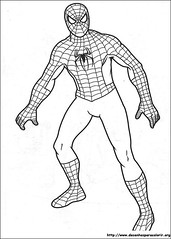

In [ ]:
img

In [ ]:
tconvert = transforms.Resize((250,250))

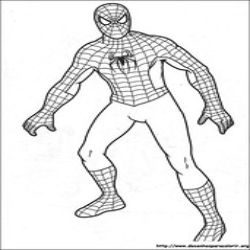

In [ ]:
tconvert(img)

In [ ]:
tconvert2 =  transforms.CenterCrop((227,227))

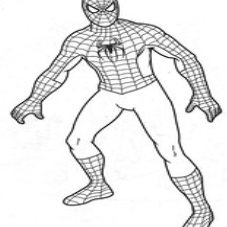

In [ ]:
tconvert2((tconvert(img)))

In [ ]:
transform = transforms.Compose([transforms.Resize((250,250)),
                                transforms.CenterCrop((227,227)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
                            ])

In [ ]:
# transform = transforms.Compose([transforms.Resize((50,50)),
#                                 transforms.ToTensor(),
#                                 transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
#                             ])

In [ ]:
img_tensor = transform(img)

In [ ]:
img_tensor.shape

torch.Size([3, 50, 50])

## Construção da classe Dataset

In [ ]:
!ls

homem  homem.csv  mulher  mulher.csv


In [ ]:
dir = './'

In [ ]:
for file_names in os.scandir('./'):
    print(file_names)

<DirEntry 'mulher.csv'>
<DirEntry 'homem.csv'>
<DirEntry 'homem'>
<DirEntry 'mulher'>


In [ ]:
classes = [d.name for d in os.scandir(dir) if d.is_dir()]

In [ ]:
classes

['homem', 'mulher']

In [ ]:
class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}

In [ ]:
class_to_idx

{'homem': 0, 'mulher': 1}

In [ ]:
instances = []
for target_class in sorted(class_to_idx.keys()):
        class_index = class_to_idx[target_class]
        target_dir = os.path.join(dir, target_class)
        for root, _, fnames in sorted(os.walk(target_dir, followlinks=True)):
            for fname in sorted(fnames):
                path = os.path.join(root, fname)
                item = path, class_index
                instances.append(item)

In [ ]:
instances

[('./homem/105851229_23f25e0252_n.jpg', 0),
 ('./homem/105851230_5ee4d6225f_n.jpg', 0),
 ('./homem/1083235551_2d1db12781_m.jpg', 0),
 ('./homem/1139558173_fc86167f16_m.jpg', 0),
 ('./homem/1140401416_242fa2b378_m.jpg', 0),
 ('./homem/131524291_1ac8e29d61_n.jpg', 0),
 ('./homem/131524294_9329ed9f3a_n.jpg', 0),
 ('./homem/147803849_83dd8347fd_n.jpg', 0),
 ('./homem/147803852_5ab37d430b_m.jpg', 0),
 ('./homem/1626169934_f3879000a5_m.jpg', 0),
 ('./homem/16726143714_26307f01aa_m.jpg', 0),
 ('./homem/16770364034_0cf67d63c8_m.jpg', 0),
 ('./homem/16772609043_6d35343307_m.jpg', 0),
 ('./homem/17140943517_0df45a286a_m.jpg', 0),
 ('./homem/17156168102_8a0e5fbd7e_m.jpg', 0),
 ('./homem/17160503000_3c75525ce5_m.jpg', 0),
 ('./homem/17161067710_bfa4d26bde_m.jpg', 0),
 ('./homem/17168685109_4fa6e151a0_m.jpg', 0),
 ('./homem/17184247788_5f00766ee8_n.jpg', 0),
 ('./homem/17194568689_bebbfe1d28_n.jpg', 0),
 ('./homem/17194756879_45c8d3da7f_n.jpg', 0),
 ('./homem/17203501438_172ca2aa14_n.jpg', 0),
 ('.

In [ ]:
from torch.utils.data import Dataset

from typing import Any,Tuple

class CarrosDataset(Dataset):
    def __init__(self,dir,transform=None,target_transform=None,loader = None):
        self.main_dir = dir
        self.transform = transform
        self.target_transform = target_transform
        self.classes = [d.name for d in os.scandir(dir) if d.is_dir()]
        self.classes.sort()
        self.class_to_idx = {cls_name: i for i, cls_name in enumerate(self.classes)}
        self.targets = []
        self.instances = self.make_instances()
        self.loader = loader

        if loader is None:
            self.loader = lambda x: Image.open(x).convert('RGB')

    def make_instances(self):
        instances = []
        targets = []
        for target_class in sorted(self.class_to_idx.keys()):
                class_index = self.class_to_idx[target_class]
                target_dir = os.path.join(self.main_dir, target_class)
                for root, _, fnames in sorted(os.walk(target_dir, followlinks=True)):
                    for fname in sorted(fnames):
                        path = os.path.join(root, fname)
                        item = path, class_index
                        targets.append(class_index)
                        instances.append(item)
        self.targets = torch.tensor(targets)
        return instances
    def __getitem__(self,index:int) -> Tuple[Any,Any]:
        path, target = self.instances[index]
        instance = self.loader(path)
        if self.transform is not None:
            instance = self.transform(instance)
        if self.target_transform is not None:
            target = self.target_transform(target)
        return instance,target
    def __len__(self) -> int:
        return len(self.instances)



In [ ]:
dataset = CarrosDataset('./',transform=transform)

In [ ]:
len(dataset)

389

In [ ]:
np.unique(dataset.targets,return_counts=True)

(array([0, 1]), array([190, 199]))

In [ ]:
#dataset = torchvision.datasets.DatasetFolder('./',loader = image_loader,extensions='jpg',transform=transform )

In [ ]:
dataset.targets = torch.tensor(dataset.targets)

<ipython-input-53-7100d4d21687>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dataset.targets = torch.tensor(dataset.targets)


# Treinamento da rede

In [ ]:
ds = dataset

In [ ]:
ds[200][0].shape

torch.Size([3, 50, 50])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
np.unique(ds.targets,return_counts=True)

(array([0, 1]), array([190, 199]))

In [ ]:
ds

In [ ]:
bs = 32
train_idx, temp_idx = train_test_split(np.arange(len(ds)),test_size=0.3,shuffle=True,stratify=ds.targets)
valid_idx, test_idx = train_test_split(temp_idx,test_size=0.5,shuffle=True,stratify=ds.targets[temp_idx])

train_sampler = torch.utils.data.SubsetRandomSampler(train_idx)
valid_sampler = torch.utils.data.SubsetRandomSampler(valid_idx)
test_sampler  = torch.utils.data.SubsetRandomSampler(test_idx)

dl_train = torch.utils.data.DataLoader(ds,batch_size=bs,sampler=train_sampler)
dl_valid = torch.utils.data.DataLoader(ds,batch_size=bs,sampler=valid_sampler)
dl_test  = torch.utils.data.DataLoader(ds,batch_size=bs,sampler=test_sampler)

In [ ]:

np.unique(ds.targets[train_idx],return_counts=True)

(array([0, 1]), array([133, 139]))

In [ ]:
np.unique(ds.targets[valid_idx],return_counts=True)

(array([0, 1]), array([28, 30]))

In [ ]:
np.unique(ds.targets[test_idx],return_counts=True)

(array([0, 1]), array([29, 30]))

In [ ]:
x,y = next(iter(dl_train))

In [ ]:
x.shape,y.shape

(torch.Size([256, 3, 50, 50]), torch.Size([256]))

In [ ]:
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')

In [ ]:
device

device(type='cuda', index=0)

In [ ]:
torch.cuda.get_device_properties(0)

_CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15101MB, multi_processor_count=40)

In [ ]:
model.to(device)

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
device

device(type='cuda', index=0)

In [ ]:
torch.cuda.get_device_properties(0)

_CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15101MB, multi_processor_count=40)

In [ ]:
m#odel = torchvision.models.mobilenet_v3_small(weights=torchvision.models.mobilenet.MobileNet_V3_Small_Weights)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
model

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (avgpool): AdaptiveAvgPool2d(output_size=1)
          (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
          (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
          (activation): ReLU()
          (scale_activation): Hardsigmoid()
        )
        (2): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), 

In [ ]:
#model.classifier[3] = nn.Linear(1024,2)

In [ ]:
model.to(device)

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (avgpool): AdaptiveAvgPool2d(output_size=1)
          (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
          (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
          (activation): ReLU()
          (scale_activation): Hardsigmoid()
        )
        (2): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), 

In [ ]:
loss_train = []
loss_eval  = []

In [ ]:
patience_time = 15

In [ ]:
criterion = nn.CrossEntropyLoss()
opt = optim.SGD(model.parameters(),lr=0.1)

In [ ]:
#!pip install wandb
#!wandb login

In [ ]:
#import wandb

#wandb.init(project="treinoLIA", entity="lablia")

In [ ]:
#!wandb login --relogin

In [ ]:
epochs = 100

stop = False
epoch = 0
lowest_loss_eval = 10000
last_best_result = 0
while (not stop):
    #wandb.watch(model)
    model.train()
    lloss = []
    for x,y in dl_train:
        x = x.to(device)
        y = y.to(device)
        pred = model(x)
        closs = criterion(pred,y)
        closs.backward()
        opt.step()
        opt.zero_grad()
        lloss.append(closs.item())
        #print(closs.item())
    loss_train.append(np.mean(lloss))
    lloss = []
    model.eval()
    lres = []
    ytrue = []
    with torch.no_grad():
        for data,y in dl_valid:
            data = data.to(device)

            pred = model(data)
            closs = criterion(pred.cpu(),y)
            lloss.append(closs.item())
            res  = pred.argmax(dim=1).cpu().tolist()
            lres += res
            ytrue += y
    avg_loss_eval = np.mean(lloss)
    loss_eval.append(avg_loss_eval)
    #wandb.log({"loss_eval": avg_loss_eval,"loss_train":loss_train[-1]})
    if avg_loss_eval < lowest_loss_eval:
        lowest_loss_eval = avg_loss_eval
        last_best_result = 0
        print("Best model found! saving...")
        actual_state = {'optim':opt.state_dict(),'model':model.state_dict(),'epoch':epoch,'loss_train':loss_train,'loss_eval':loss_eval}
        torch.save(actual_state,'best_model.pth')
    last_best_result += 1
    if last_best_result > patience_time:
        stop = True
    print("epoch %d loss_train %4.3f loss_eval %4.3f last_best %d"%(epoch,loss_train[-1],loss_eval[-1],last_best_result))
    epoch += 1

epoch 0 loss_train 8.208 loss_eval 5725069.500 last_best 1
Best model found! saving...
epoch 1 loss_train 2.794 loss_eval 1078.493 last_best 1
Best model found! saving...
epoch 2 loss_train 1.048 loss_eval 2.649 last_best 1
Best model found! saving...
epoch 3 loss_train 0.771 loss_eval 1.360 last_best 1
Best model found! saving...
epoch 4 loss_train 1.002 loss_eval 0.959 last_best 1
Best model found! saving...
epoch 5 loss_train 0.693 loss_eval 0.795 last_best 1
epoch 6 loss_train 0.651 loss_eval 1.743 last_best 2
epoch 7 loss_train 0.857 loss_eval 0.964 last_best 3
epoch 8 loss_train 0.700 loss_eval 1.442 last_best 4
epoch 9 loss_train 0.730 loss_eval 1.000 last_best 5
epoch 10 loss_train 0.650 loss_eval 1.304 last_best 6
epoch 11 loss_train 0.689 loss_eval 0.996 last_best 7
epoch 12 loss_train 0.482 loss_eval 1.124 last_best 8
epoch 13 loss_train 0.539 loss_eval 2.033 last_best 9
epoch 14 loss_train 0.583 loss_eval 1.173 last_best 10
epoch 15 loss_train 0.561 loss_eval 1.387 last_bes

In [ ]:
recover = torch.load('best_model.pth')
#actual_state = {'optim':opt.state_dict(),'model':model.state_dict(),'epoch':epoch}

In [ ]:
opt.load_state_dict(recover['optim'])
model.load_state_dict(recover['model'])
loss_train = recover['loss_train']
loss_eval = recover['loss_eval']
epoch = recover['epoch']

In [ ]:
epoch

5

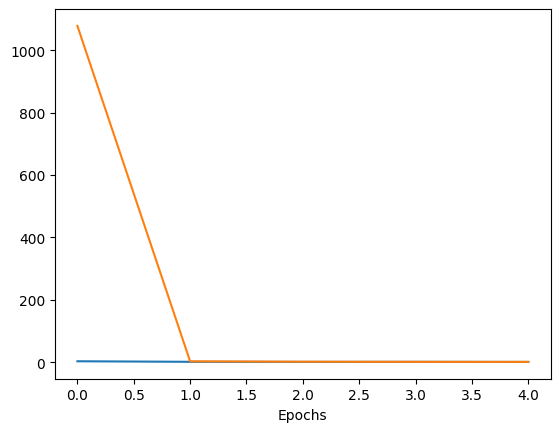

In [ ]:
import matplotlib.pyplot as plt


fig = plt.figure()
plt.plot(loss_train[1:])
plt.plot(loss_eval[1:])
plt.xlabel('Epochs')
plt.show()

In [ ]:
import sklearn.metrics as metrics

In [ ]:
model.to(device)

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
model.eval()
lres = []
ytrue = []
with torch.no_grad():
    for data,target in dl_test:
        data = data.to(device)
        pred = model(data)
        res  = pred.argmax(dim=1).cpu().tolist()
        lres += res
        ytrue += target

In [ ]:
metrics.confusion_matrix(ytrue,lres)

array([[18, 11],
       [ 7, 23]])

In [ ]:
metrics.accuracy_score(ytrue,lres)

0.6949152542372882

In [ ]:
metrics.precision_score(ytrue,lres)

0.6764705882352942

In [ ]:
metrics.recall_score(ytrue,lres)

0.7666666666666667

In [ ]:
metrics.f1_score(ytrue,lres)

0.71875

In [ ]:
import torchvision.models as models



model = models.mobilenet_v3_small(pretrained=True)
model.classifier[3] = nn.Linear(1024,2)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
model = models.efficientnet_v2_s(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_V2_S_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_V2_S_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_v2_s-dd5fe13b.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_v2_s-dd5fe13b.pth
100%|██████████| 82.7M/82.7M [00:02<00:00, 42.3MB/s]


In [ ]:
model

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
model.classifier[1] = nn.Linear(1280,2)

#Visualização de imagem e predição

In [ ]:
img = image_loader('./porche/5620545776_04d0761bb7_m.jpg')

FileNotFoundError: ignored

Atividade: Rodar com SGD, Adam, AdamW e RMSProp.
(1) Mostrar um gráfico comparativo da loss na validação dos diferentes otimizadores e (2) uma tabela comparativa dos resultados de precision, recall e f1 para cada optimizador.

In [ ]:



modules = list(model.features.children())[:-4] # tirando as camadas 11 e 12

len(modules)
model.features = nn.Sequential(*modules)


#for param in model.parameters():
#    param.requires_grad = False

x = torch.randn(10,3,224,224).to(device)
pred = model.avgpool(model.features(x))

pred.shape

input_dim = pred.shape[1]*pred.shape[2]*pred.shape[3]

model.classifier[0] = nn.Linear(input_dim,1024)
model.classifier[3] = nn.Linear(1024,2)

model.to(device)

# K Fold

In [ ]:
from sklearn.model_selection import StratifiedKFold